In [4]:
# imports
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
# set the theme for the plots
sb.set()

In [6]:
# read the csv into a dataframe
diamonds_df = pd.read_csv("diamonds.csv")

# view the first few rows of the dataframe
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# the first column was supposed to be the index, but we don't need it so we will drop it
diamonds_df.drop('Unnamed: 0',  # column name
                 axis=1,        # specify that it is a column (by default it is axis=0 which is row)
                 inplace=True   # changes the original dataframe instead of returning a new dataframe
                )

# view the first few rows of the dataframe
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Exploratory Data Analysis

## Numerical Features

In [8]:
# get general info of the dataframe
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
# get the numerical features
diamonds_num_df = diamonds_df.select_dtypes(include=['int64', 'float64'])
diamonds_num_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [10]:
# get general statistics of the numerical features
diamonds_num_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


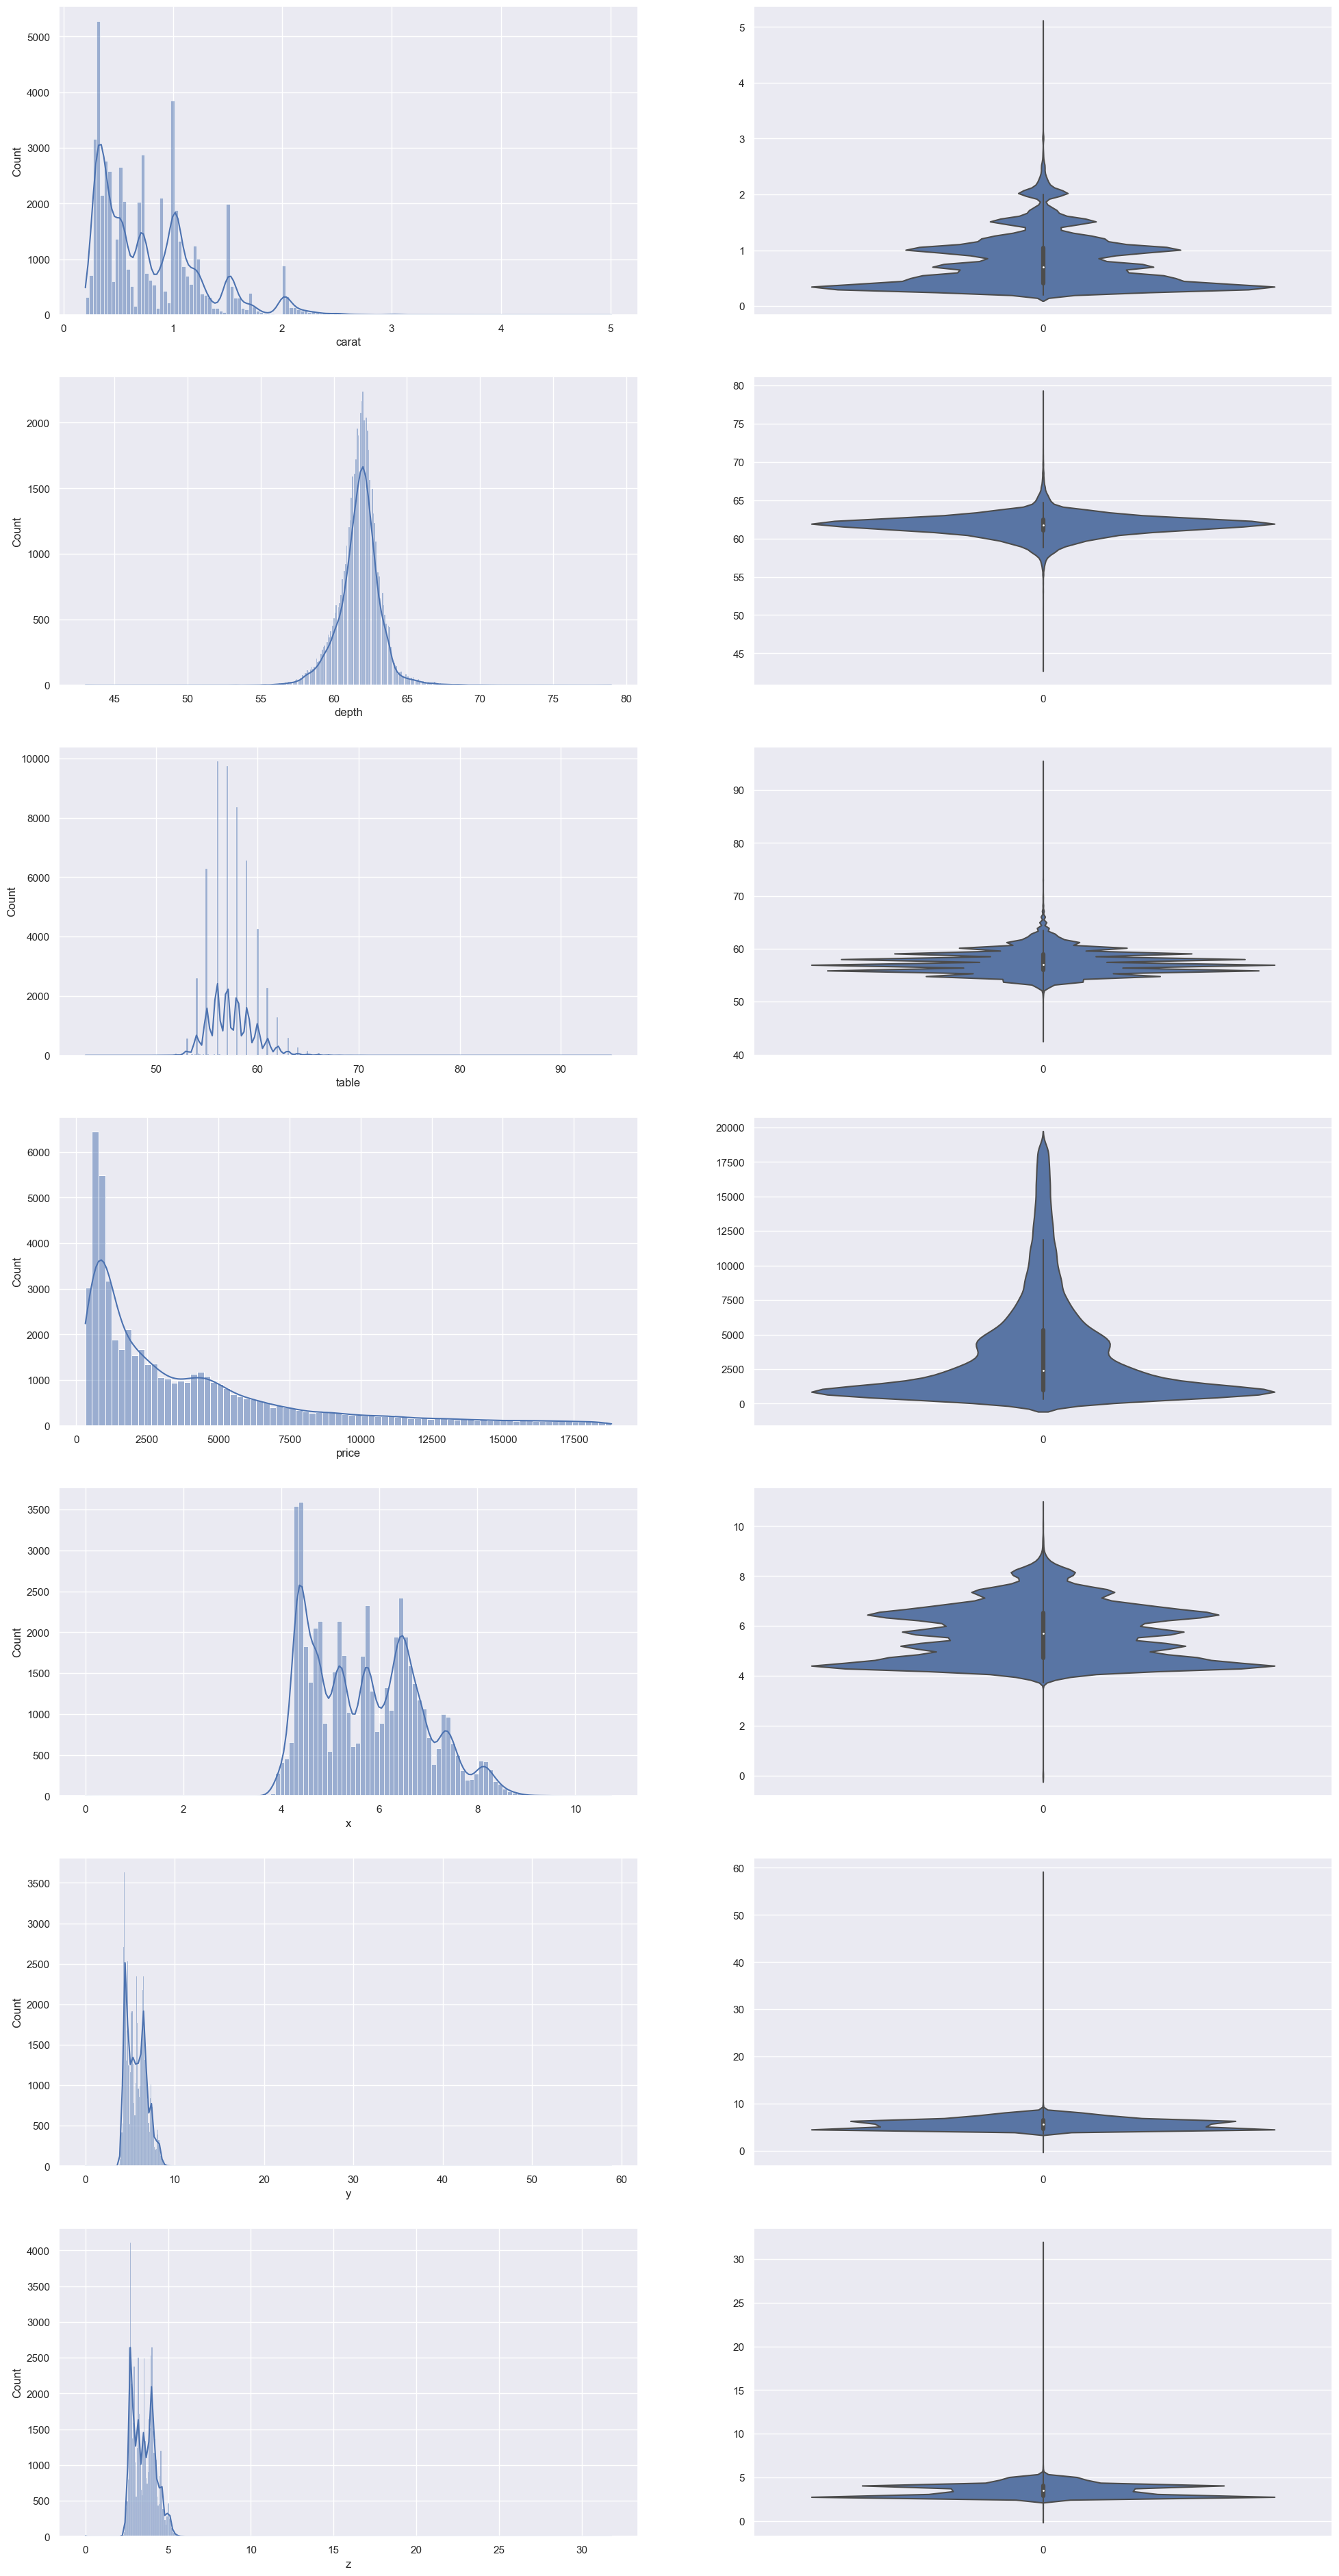

In [11]:
# get histograms, KDE and violin plot of the numerical features
f, axes = plt.subplots(len(diamonds_num_df.columns), 2, figsize=(24,48))

for row, feature in enumerate(diamonds_num_df.columns):
    
    # histogram
    sb.histplot(data=diamonds_num_df[feature],  # specify what is the data that you want to plot
                kde=True,                       # specify that you want the KDE to be represented
                ax=axes[row, 0]                 # specify where on the subplot you want this plot to be
               )
    
    # violin plot
    sb.violinplot(data=diamonds_num_df[feature],  # specify what is the data that you want to plot
                  ax=axes[row, 1]                 # specify where on the subplot you want this plot to be
                 )

<AxesSubplot: >

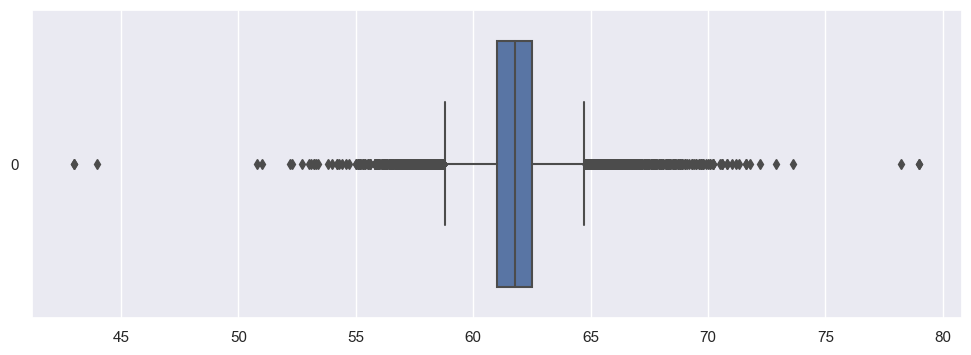

In [12]:
# set the figure size
f = plt.figure(figsize=(12,4))

# get a boxplot of depth
sb.boxplot(data=diamonds_num_df['depth'],  # specify data
           orient='h'                      # specify orientation ('h' for horizontal, 'v' for vertical)
          )

<AxesSubplot: >

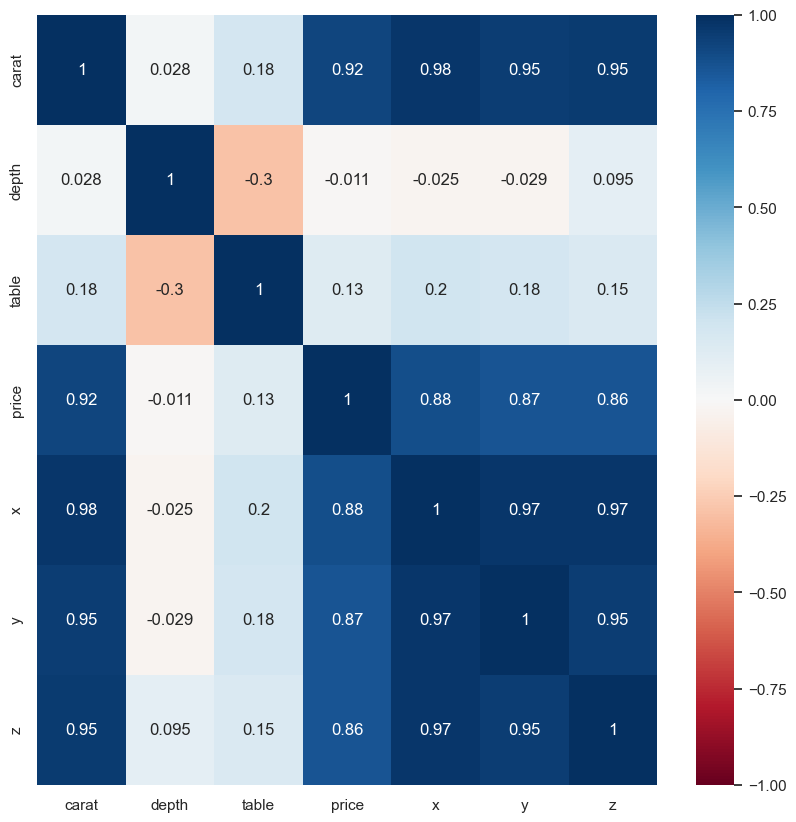

In [13]:
# set the figure size
f = plt.figure(figsize=(10,10))

# get correlation heatmap of the numerical features
sb.heatmap(diamonds_num_df.corr(),  # get the correlation matrix from the dataframe
           vmin=-1,                 # set the minimum value
           vmax=1,                  # set the maximum value
           cmap='RdBu',             # set the colours (Red is minimum, Blue is maximum)
           annot=True               # specify that you want the correlation value to be displayed
          )

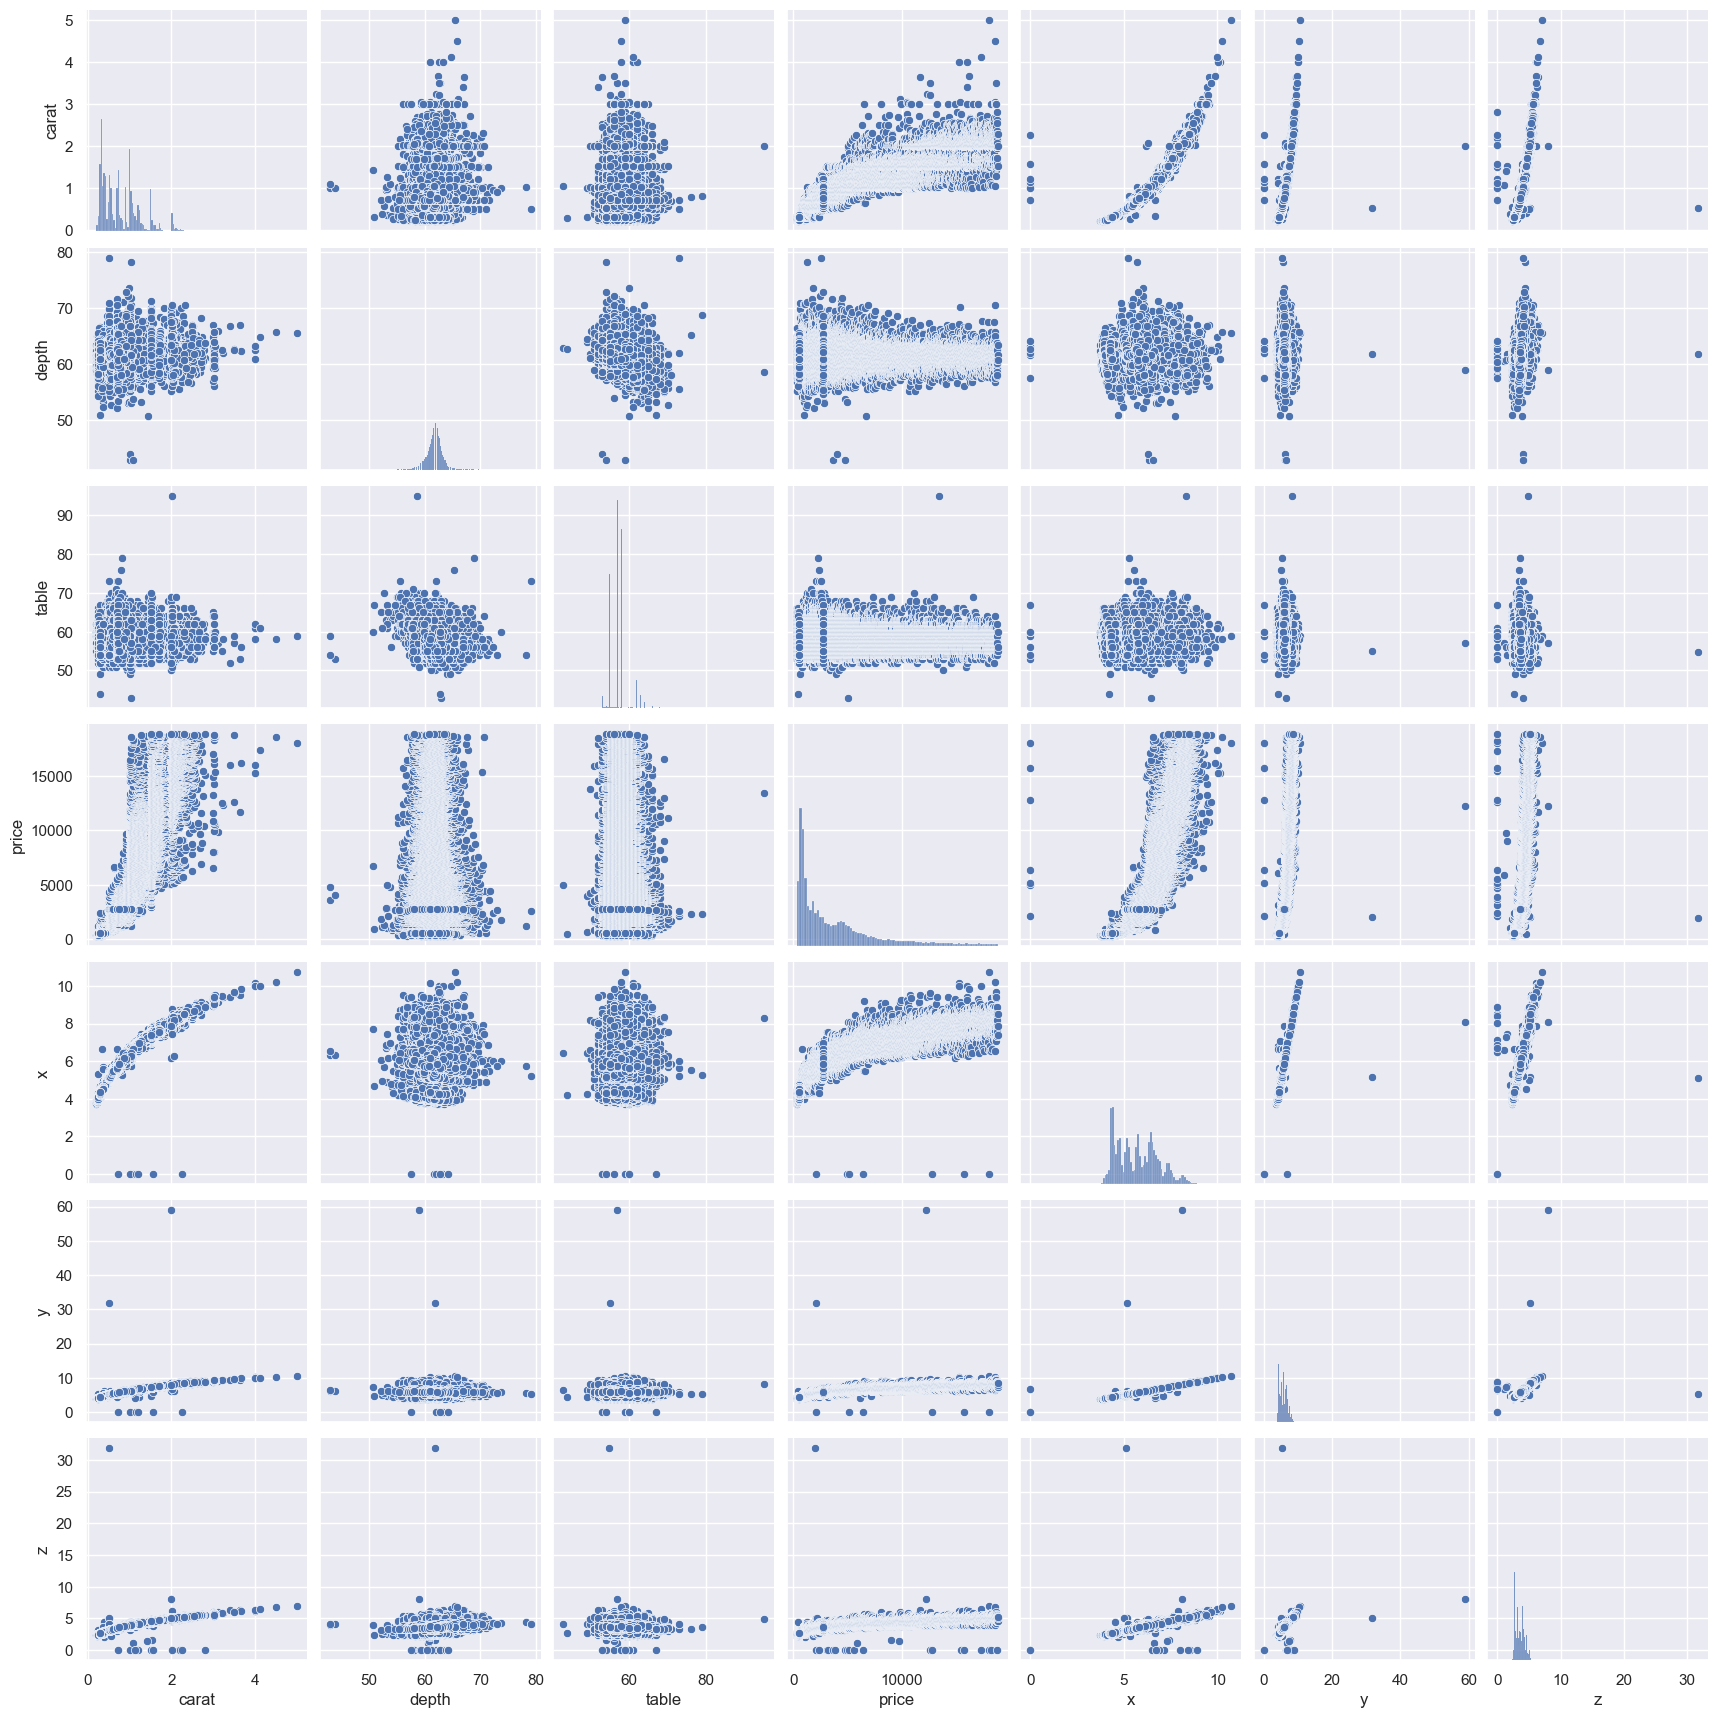

In [14]:
# get pair plot of the numerical features
sb.pairplot(diamonds_num_df)

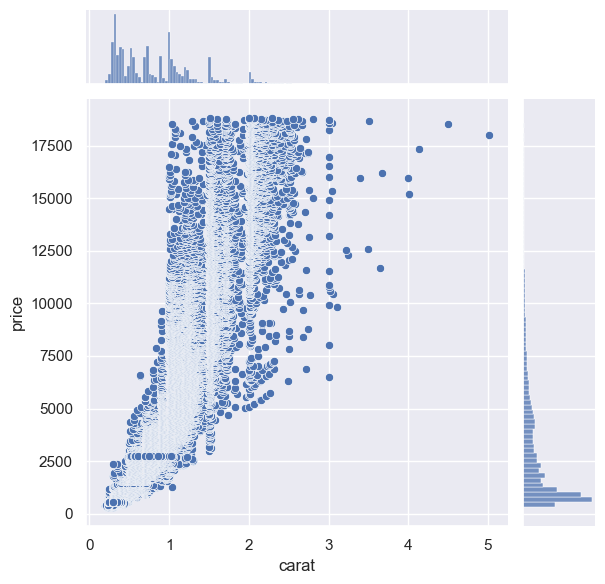

In [15]:
# get jointplot of price and carat
sb.jointplot(data=diamonds_num_df,  # specify data
             x='carat',             # specify x axis
             y='price'              # specify y axis
            )

Don't worry about the plots bugging out, it's just trying to plot too many points.

## Categorical Fetaures

In [16]:
# get the categorical features
diamonds_cat_df = diamonds_df.select_dtypes(include='object')
diamonds_cat_df.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [17]:
# convert the datatype into categorical for easier processing
diamonds_cat_df = diamonds_cat_df.astype('category')
diamonds_cat_df.dtypes

cut        category
color      category
clarity    category
dtype: object

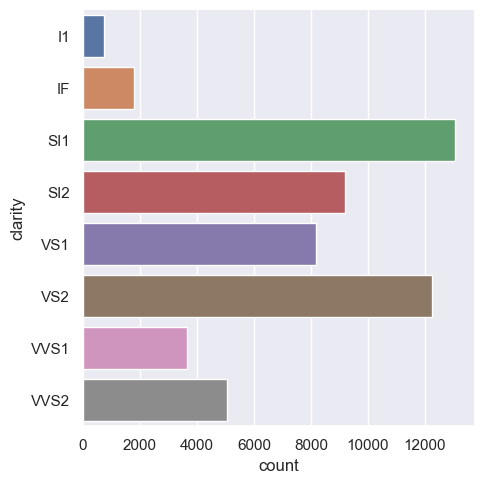

In [18]:
# get a catplot of clarity
sb.catplot(y='clarity', data=diamonds_cat_df, kind='count')

<AxesSubplot: xlabel='clarity', ylabel='cut'>

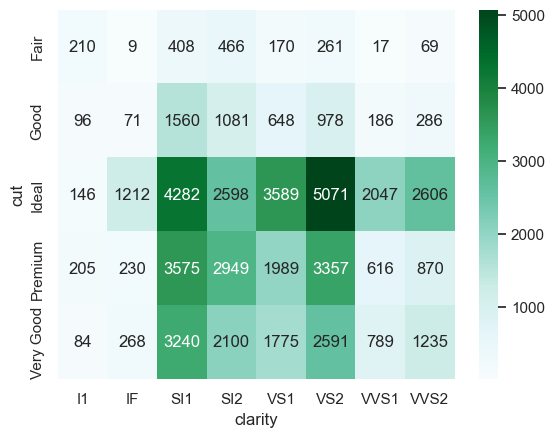

In [19]:
# get correlation heatmap of cut and clarity

sb.heatmap(diamonds_cat_df.groupby(['cut', 'clarity']).size().unstack(),
           fmt='g',
           cmap='BuGn',
           annot=True
          )

# Machine Learning

## Training set and Testing set

Generally, 70% of the dataset will be used to train the model while the remaining 30% will be used to test the model  
  
There should not be any overlap between the training set and the testing set to ensure the validity of the test results (we want to see how well the model does against new data)  
  
There are two ways to split the dataset, **manually** or by using the **train_test_split** function from sklearn

### Manual Splitting

In [20]:
# find out how much "30% of the dataset" is
print(f"dataset has {len(diamonds_df)} rows")
print(f"30% of the dataset is {round(len(diamonds_df)*0.3)} rows")
print(f"70% of the dataset is {round(len(diamonds_df)*0.7)} rows")

dataset has 53940 rows
30% of the dataset is 16182 rows
70% of the dataset is 37758 rows


In [21]:
# set aside first 37758 rows for training set
train_df = diamonds_df[:37758]
test_df = diamonds_df[-16182:]

print(f"Train set rows: {len(train_df)}")
print(f"Test set rows: {len(test_df)}")

Train set rows: 37758
Test set rows: 16182


### train_test_split

In [22]:
# import the function
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(diamonds_df,    # specify the dataset to split
                                     test_size=0.3,  # specify the proportion to set aside for test set
                                     shuffle=True,   # specify that you want to shuffle the dataset before splitting
                                     random_state=0  # set the random state for reproducible results
                                    )

print(f"Train set rows: {len(train_df)}")
print(f"Test set rows: {len(test_df)}")

Train set rows: 37758
Test set rows: 16182


As you can see, using train_test_split is much more intuitive than doing it manually.
  
Another benefit of using train_test_split is that the data in each set is much more representative of the whole dataset due to the shuffling before splitting.

## Linear Regression

Let us try to predict price using carat

First, we extract the data that we want and put it into a new dataframe

In [23]:
# extract the data needed and put them into a feature dataframe and target dataframe
reg_X_train, reg_y_train = pd.DataFrame(train_df['carat']), pd.DataFrame(train_df['price'])
reg_X_test, reg_y_test = pd.DataFrame(test_df['carat']), pd.DataFrame(test_df['price'])

Now, let us train a linear model.

In [24]:
# import necessary things
from sklearn.linear_model import LinearRegression

# create model object
linear_model = LinearRegression()

# train the model
linear_model.fit(reg_X_train, reg_y_train)

LinearRegression()

### Model evaluation and visualisation

We can view the intercepts and coefficients of the linear model by printing out the attributes of the model

In [25]:
print(f"Intercept:\tc = {linear_model.intercept_}")
print(f"Coefficients:\tm = {linear_model.coef_}")

Intercept:	c = [-2247.70447085]
Coefficients:	m = [[7741.37904828]]


We can see how well the model fit the data by plotting the best fit line on a scatter plot of the data

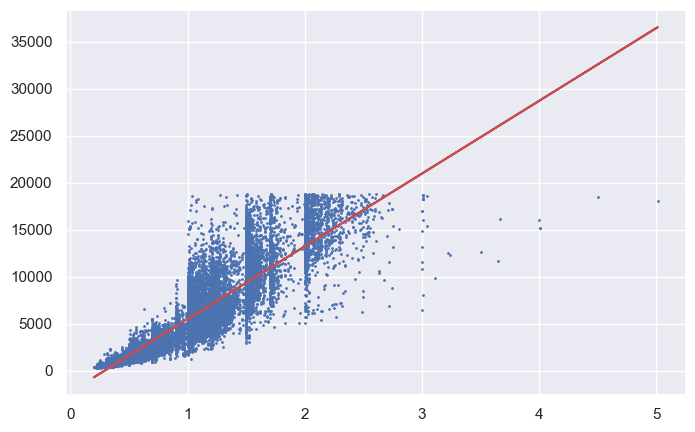

In [26]:
# get necessary things for plotting the best fit line
regline_x = reg_X_train
regline_y = (linear_model.coef_ * reg_X_train) + linear_model.intercept_

# plots
f = plt.figure(figsize=(8,5))
plt.scatter(reg_X_train, reg_y_train, s=1)
plt.plot(regline_x, regline_y, 'r-')
plt.show()

We can also see how well the model fit the data by using some metrics.
  
For regression tasks, the coefficient of determination (R^2), mean squared error (MSE), root mean squared error (RMSE) are the most commonly used metrics.
  
Lucky for us, sklearn lets us do all of these easily

In [27]:
# import the mean squared error function
from sklearn.metrics import mean_squared_error

# print R^2 score
print(f"R^2:\t{linear_model.score(reg_X_train, reg_y_train)}")

# get model predictions
reg_y_train_preds = linear_model.predict(reg_X_train)

# get mean squared error
mse = mean_squared_error(reg_y_train,        # actual target values
                         reg_y_train_preds,  # predicted target values
                         squared=True        # specify if you want it to be squared (set to "False" for RMSE)
                        )

print(f"MSE:\t{mse:.5f}")

R^2:	0.8486187807734036
MSE:	2408781.08237


Let's see the performance of the linear model on the test set

In [28]:
# print R^2 score
print(f"R^2:\t{linear_model.score(reg_X_test, reg_y_test)}")

# get model predictions
reg_y_test_preds = linear_model.predict(reg_X_test)

# get mean squared error
mse = mean_squared_error(reg_y_test,        # actual target values
                         reg_y_test_preds,  # predicted target values
                         squared=True       # specify if you want it to be squared (set to "False" for RMSE)
                        )

print(f"MSE:\t{mse:.5f}")

R^2:	0.8509771156910653
MSE:	2372901.27929


As we can see, the performance is quite similar.

# Decision Trees
There are many different types of tree methods in machine learning, but the most basic ones are the DecisionTreeClassifier and DecisionTreeRegressor from sklearn.
  
Let's try to predict cut using price
  
First, let us see how many categories there are in cut

In [29]:
print(f"Number of categories in cut:\t{diamonds_df['cut'].nunique()}")
print(diamonds_df['cut'].unique())

Number of categories in cut:	5
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


Let's see the class distribution for cut.

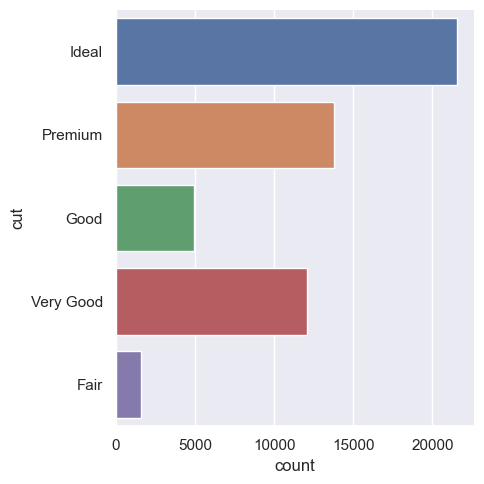

In [30]:
sb.catplot(y='cut',
            data=diamonds_df,
            kind='count'
           )

For the sake of simplicity, we will be doing a binary classification task.
  
Let's only get rows that are either 'Premium' or 'Very Good' since they have roughly the same number of samples.

In [31]:
# filter out rows that contain either 'Ideal' or 'Fair'
cls_train_df = train_df.loc[train_df['cut'].isin(['Premium', 'Very Good'])]
cls_test_df = test_df.loc[test_df['cut'].isin(['Premium', 'Very Good'])]

# filter out the necessary features
cls_train_df = cls_train_df[['cut', 'price']]
cls_test_df = cls_test_df[['cut', 'price']]

# get train features and targets
cls_X_train, cls_y_train = pd.DataFrame(cls_train_df['price']), cls_train_df['cut']
cls_X_test, cls_y_test = pd.DataFrame(cls_test_df['price']), cls_test_df['cut']

### Training the model

In [32]:
# import model
from sklearn.tree import DecisionTreeClassifier

# create model object
dec_tree = DecisionTreeClassifier(max_depth=3)

# train model
dec_tree.fit(cls_X_train, cls_y_train)

DecisionTreeClassifier(max_depth=3)

max_depth controls how far we want the decision tree to split the dataset. Generally, if we want the model to perform better, we would want the model to split the dataset as far as possible. However, this comes at the cost of increased training time and conputation.
  
For the sake of visualisation later, we will limit max_depth to 3.

### Model evaluation
For classification tasks, accuracy is the most common metric used to judge a model performance

In [33]:
# print model accuracy on train set
print(f"Train accuracy:\t{dec_tree.score(cls_X_train, cls_y_train)}")

Train accuracy:	0.5588039867109634


We can see that the model did slightly better than random.

Another way to look at a model's performance is by using a confusion matrix.
  
The confusion matrix shows 4 boxes representing different things:
1. True Positive Rate (tpr)
2. False Positive Rate (fpr)
3. False Negative Rate (fnr)
4. True Negative Rate (tnr)
  
From the confusion matrix, we can calculate the accuracy, precision and recall of the model.

<AxesSubplot: >

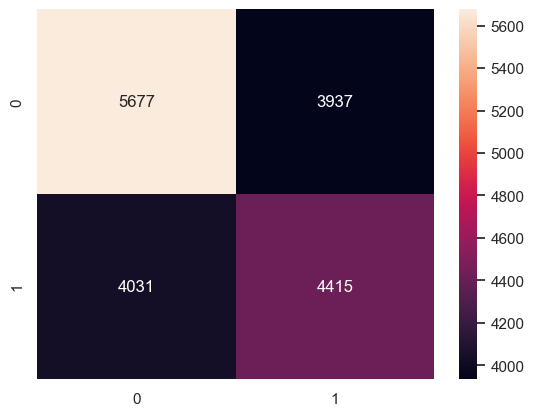

In [34]:
# import confusion matrix function
from sklearn.metrics import confusion_matrix

# get predictions on train set
cls_y_train_preds = dec_tree.predict(cls_X_train)

# show heatmap of confusion matrix
sb.heatmap(confusion_matrix(cls_y_train, cls_y_train_preds),  # get confusion matrix of model
           annot=True,                                        # specify that we want annotations
           fmt='.0f'                                          # specify that we do not want to see decimal places
          )

### Model visualisation
We can visualise how the model makes decisions using graphviz

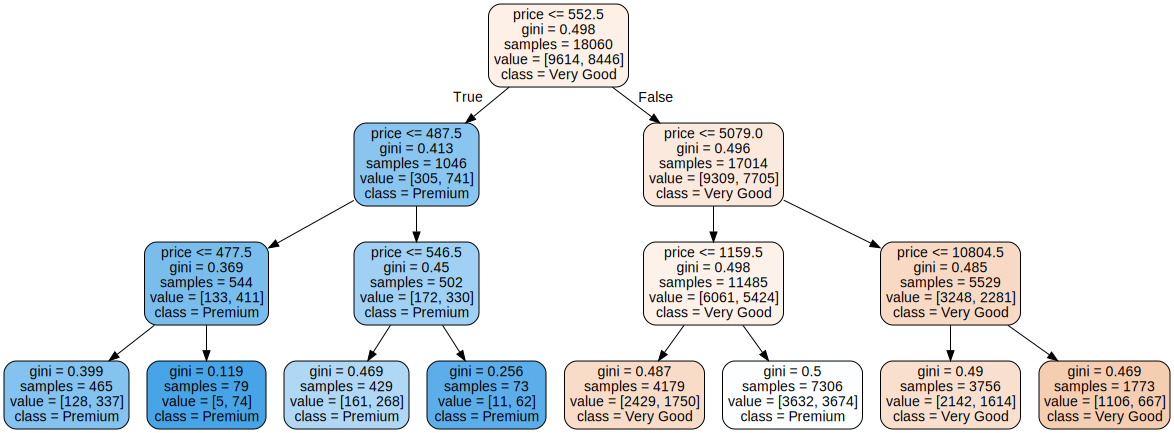

In [35]:
# imports
import graphviz
from sklearn.tree import export_graphviz

# convert the model into a format readable by graphviz
tree_viz = export_graphviz(dec_tree,                           # decision tree model
                           feature_names=cls_X_train.columns,  # specify feature names to display
                           class_names=cls_y_train.unique(),   # specify the class names to display
                           filled=True,                        # specify that you want additional info to be displayed
                           rounded=True                        # specify that you want the boxes to be rounded
                          )

# create graph object from our exported model using graphviz
graph = graphviz.Source(tree_viz)

graph

The same can be done with the plot_tree function from sklearn, but graphviz just looks nicer lol.

[Text(0.5, 0.875, 'price <= 552.5\n0.498\n18060\n[9614, 8446]\nVery Good'),
 Text(0.25, 0.625, 'price <= 487.5\n0.413\n1046\n[305, 741]\nPremium'),
 Text(0.125, 0.375, 'price <= 477.5\n0.369\n544\n[133, 411]\nPremium'),
 Text(0.0625, 0.125, '0.399\n465\n[128, 337]\nPremium'),
 Text(0.1875, 0.125, '0.119\n79\n[5, 74]\nPremium'),
 Text(0.375, 0.375, 'price <= 546.5\n0.45\n502\n[172, 330]\nPremium'),
 Text(0.3125, 0.125, '0.469\n429\n[161, 268]\nPremium'),
 Text(0.4375, 0.125, '0.256\n73\n[11, 62]\nPremium'),
 Text(0.75, 0.625, 'price <= 5079.0\n0.496\n17014\n[9309, 7705]\nVery Good'),
 Text(0.625, 0.375, 'price <= 1159.5\n0.498\n11485\n[6061, 5424]\nVery Good'),
 Text(0.5625, 0.125, '0.487\n4179\n[2429, 1750]\nVery Good'),
 Text(0.6875, 0.125, '0.5\n7306\n[3632, 3674]\nPremium'),
 Text(0.875, 0.375, 'price <= 10804.5\n0.485\n5529\n[3248, 2281]\nVery Good'),
 Text(0.8125, 0.125, '0.49\n3756\n[2142, 1614]\nVery Good'),
 Text(0.9375, 0.125, '0.469\n1773\n[1106, 667]\nVery Good')]

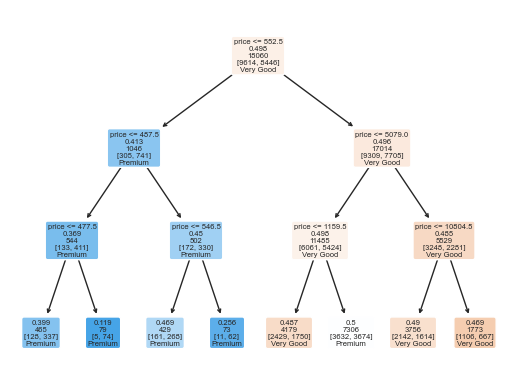

In [36]:
# import the plot_tree function
from sklearn.tree import plot_tree

# plot the tree
plot_tree(dec_tree,
          feature_names=cls_X_train.columns,
          class_names=cls_y_train.unique(),
          label=True,
          filled=True,
          rounded=True
         )

# Clustering
Clustering is an unsupervised machine learning method. This means that we do not need to provide it with a target variable.
  
The model uses some statistical method to figure out groups within the data.

For now, let's see if we can find clusters in table and depth

In [37]:
# extract table and depth into a new dataframe
cluster_df = pd.DataFrame(diamonds_df[['table', 'depth']])
cluster_df.head()

,table,depth
0,55.0,61.5
1,61.0,59.8
2,65.0,56.9
3,58.0,62.4
4,58.0,63.3


We can plot a scatterplot to see if we can eyeball any clusters

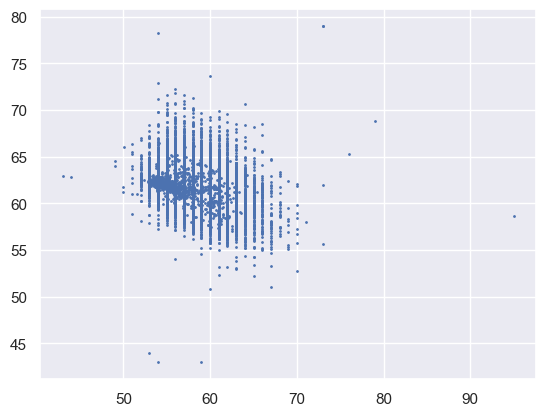

In [38]:
plt.scatter(data=cluster_df,
            x='table',
            y='depth',
            s=1
           )

Yeah no, can't see much.

## K-Means clustering
The most basic clustering method is K-Means clustering. We will import it from sklearn.

In [48]:
# import the KMeans module
from sklearn.cluster import KMeans

K-Means requires us to provide it with the number of clusters we want. Generally, this is determined by what you want to do with the clusters (e.g. if you want to see if the clusters can be used for classification, then you can set the number of clusters to be the number of classes)
  
For now, we can just set it to an arbitary number like 3.

In [49]:
# create kmeans object
kmeans = KMeans(n_clusters=2)

# fit the model
kmeans.fit(cluster_df)

KMeans(n_clusters=2)

Let's see some details about the clusters it has found.

In [50]:
print("Features", "\ttable", "\tdepth\n")

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features 	table 	depth

Cluster 0:	59.8	61.05	
Cluster 1:	56.16	62.14	


It's a bit hard to visualise it just by seeing these numbers. Let's plot it out on a scatterplot.

In [51]:
# get labels for the clusters that each datapoint is in
labels = kmeans.predict(cluster_df)

# copy the dataframe so that we don't edit the original dataframe
labelled_cluster_df = cluster_df.copy()

# create a new column for the cluster labels
labelled_cluster_df['cluster'] = pd.Categorical(labels)

labelled_cluster_df.head()

,table,depth,cluster
0,55.0,61.5,1
1,61.0,59.8,0
2,65.0,56.9,0
3,58.0,62.4,1
4,58.0,63.3,1


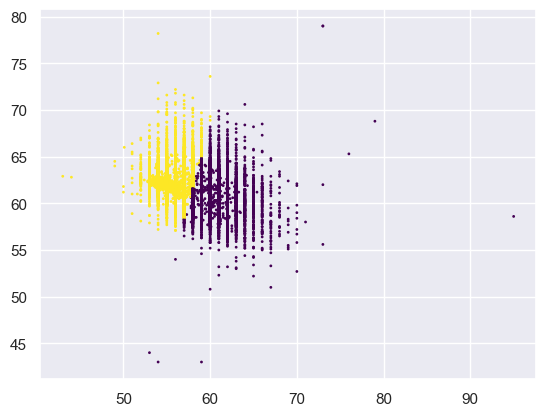

In [52]:
# plot scatterplot
plt.scatter(x='table',
            y='depth',
            s=1,
            c='cluster',     # specify how we want the colours to be assigned
            cmap='viridis',  # specify the colours that we want to use
            data=labelled_cluster_df
           )

## Local Outlier Factor
Local Outlier Factor is used to identify outliers in a dataset. Like K-Means, it is an unsupervised machine learning method

In [53]:
# imports
from sklearn.neighbors import LocalOutlierFactor

# create LocalOutlierFactor object
lof = LocalOutlierFactor(n_neighbors=5)

# fit the model to our data and get the local outlier factor values
outlier_factor = lof.fit_predict(cluster_df)

# copy dataset
outlier_label_df = cluster_df.copy()

# create a new column for outlier labels
outlier_label_df['lof'] = pd.Categorical(outlier_factor)

outlier_label_df.head()

,table,depth,lof
0,55.0,61.5,1
1,61.0,59.8,1
2,65.0,56.9,1
3,58.0,62.4,1
4,58.0,63.3,1


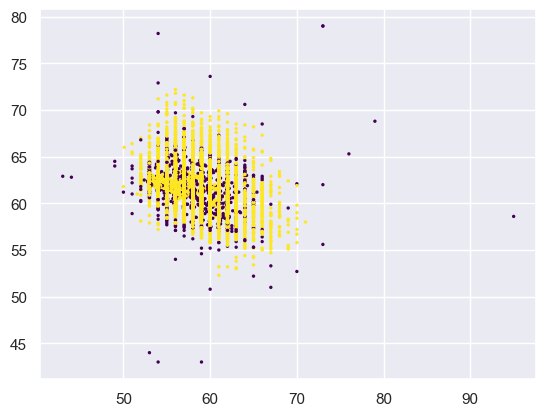

In [54]:
# plot scatter
plt.scatter(x='table',
            y='depth',
            c='lof',
            s=2,
            cmap='viridis',
            data=outlier_label_df
           )